# Financial crimes Classification

### Dataset
* csv file: [Kaggle creditcard](https://www.kaggle.com/datasets/alexderi/creditcard)

# Part I (Without RAY)
Sklearn and Ray both make perfect candidate to train an interpretable algorithm. First we are going to:

* Create an algorithm without using Ray that gives you good results
* Load the dataset, isolate the predictors from the target variable, and split the dataset between a training set and a validation set.
* Build a pipeline with two steps: a standardization, Then run the training script over Ray.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

## Loading dataset

In [2]:
# Loading the Dataset
file_path = '/kaggle/input/creditcard/creditcard.csv'
df=pd.read_csv(file_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data visualization

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
available_classes = df['Class'].value_counts()
print('Non Fraud number:', available_classes[0])
print('Fraud number:', available_classes[1])

Non Fraud number: 284315
Fraud number: 492


/tmp/ipykernel_33/3573155565.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['Class'], sort=True)


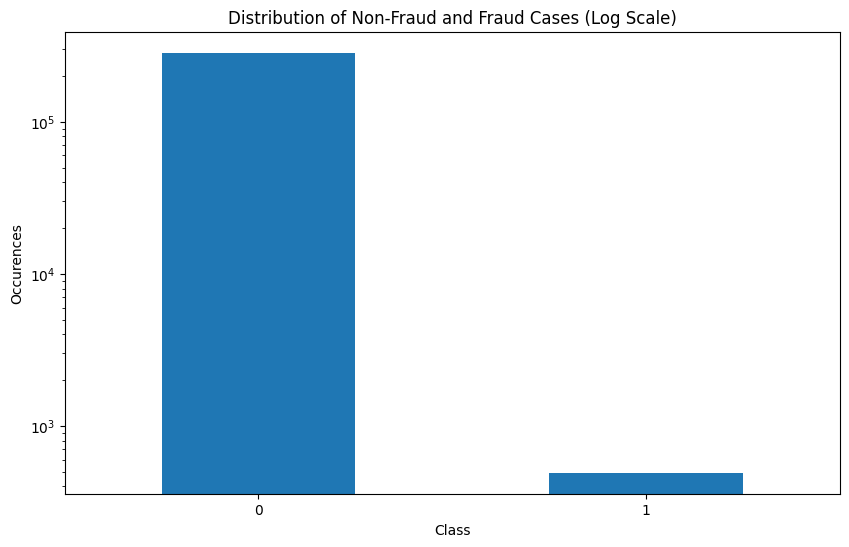

In [5]:
# Show the occurrences of each class
plt.figure(figsize=(10, 6))

classes = pd.value_counts(df['Class'], sort=True)
classes.plot(kind='bar', rot=0)
plt.yscale('log')

plt.title('Distribution of Non-Fraud and Fraud Cases (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Occurences')

plt.show()

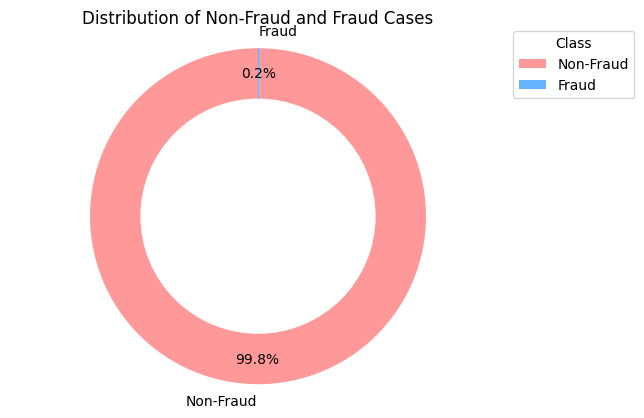

In [6]:
ax = df['Class'].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff'],
    legend=True,
    title='Distribution of Non-Fraud and Fraud Cases',
    ylabel='',
    labels=['Non-Fraud', 'Fraud'],
    labeldistance=1.1,
    startangle=90,
    pctdistance=0.85
)

ax.legend(
    bbox_to_anchor=(1, 1.02),
    loc='upper left',
    title='Class'
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.show()

## Datasets setup and model training

In [7]:
# Split the input data and output labels
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset into training and validation set (repartition: 0.8 | 0.2)
%time X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", len(X_train))
print("Validation size:", len(X_val))

CPU times: user 72.7 ms, sys: 20 ms, total: 92.7 ms
Wall time: 93.8 ms
Training size: 227845
Validation size: 56962


In [8]:
# Pipeline setup and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear'))
])

%time pipeline.fit(X_train, y_train)

CPU times: user 4.9 s, sys: 139 ms, total: 5.04 s
Wall time: 5.04 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(solver='liblinear'))])

## Results and interpretation

In [9]:
y_pred = pipeline.predict(X_val)
report = classification_report(y_val, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### Interpretation

The accuracy of 1.00 is misleading due to the class imbalance. The model could achieve high accuracy by predominantly predicting the majority class (non-fraud) correctly.

The precision of 0.86 for fraud cases is relatively high, indicating the model is fairly good at predicting fraud cases correctly. However, the recall of 0.58 is low, meaning the model misses a significant number of actual fraud cases.

# Part II (Without RAY)

Now we want to get more accurate results, we are going to:

* Run a hyperparameter tuning job that improves your initial performance

## GridSearchCV for hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 5, 8, 10, 12, 100, 1000],
    'model__penalty': ['l1', 'l2']
}

# Grid Search on our model
# F1_score is taken because the Accuracy is not relevant in our case
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

%time grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

CPU times: user 9.45 s, sys: 825 ms, total: 10.3 s
Wall time: 3min 2s
{'model__C': 8, 'model__penalty': 'l1'}


## Results and interpretation

In [11]:
y_pred = grid_search.predict(X_val)
report_best = classification_report(y_val, y_pred)
print(report_best)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



After performing the GridSearchCV on the logistic regression model, we observe no improvement in performance. Several factors could contribute to this outcome:

- Class imbalance / Data quantity
- Feature complexity
- Model limitations (Logistic regression might not be the best model)

# Part I (Using RAY)

In [12]:
!pip install -U "ray[data]" pandas==2.1.4
!pip install tune-sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 MB 21.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Uninstalling ray-2.9.0:
      Successfully uninstalled ray-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.pos

In [13]:
import ray
import joblib
from ray.util.joblib import register_ray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

2024-06-09 21:05:00,374	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [14]:
ray.init()

2024-06-09 21:05:03,726	INFO worker.py:1753 -- Started a local Ray instance.


Python version:,3.10.13
Ray version:,2.24.0


## Datasets setup and model training

In [15]:
@ray.remote
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

@ray.remote
def split_data(data):
    X = data.drop(columns=['Class'])
    y = data['Class']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

In [16]:
file_path = '/kaggle/input/creditcard/creditcard.csv'
%time data = ray.get(load_data.remote(file_path))

X_train, X_val, y_train, y_val = ray.get(split_data.remote(data))

print("Training size:", len(X_train))
print("Validation size:", len(X_val))

CPU times: user 122 ms, sys: 32.3 ms, total: 154 ms
Wall time: 4.6 s
Training size: 227845
Validation size: 56962


In [17]:
@ray.remote
def train_model(X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(solver='liblinear'))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

@ray.remote
def evaluate_model(pipeline, X_val, y_val):
    y_pred = pipeline.predict(X_val)
    report = classification_report(y_val, y_pred)
    return report

In [18]:
%time pipeline = ray.get(train_model.remote(X_train, y_train))

CPU times: user 36.7 ms, sys: 94.2 ms, total: 131 ms
Wall time: 5.29 s


## Results and interpretation

In [19]:
report = ray.get(evaluate_model.remote(pipeline, X_val, y_val))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# Part II (Using RAY)
Now we want to get more accurate results, we are going to:

* Run a hyperparameter tuning job that improves your initial performance

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'model__C': np.logspace(-6, 6, 30),
    'model__penalty': ['l1', 'l2']
}

register_ray()

def hyperparameter_tuning(X_train, y_train, param_space):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(solver='liblinear'))
    ])
    search = RandomizedSearchCV(pipeline, param_space, cv=5, n_iter=30, verbose=10)
    with joblib.parallel_backend('ray'):
        search.fit(X_train, y_train)
    return search

@ray.remote
def evaluate_tuned_model(pipeline, X_val, y_val):
    y_pred_best = pipeline.predict(X_val)
    report_best = classification_report(y_val, y_pred_best)
    return report_best

In [21]:
rdm_search = hyperparameter_tuning(X_train, y_train, param_space)
best_params = rdm_search.best_params_

print(best_params)

2024-06-09 21:05:17,050	WARNING pool.py:589 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
(PoolActor pid=509) [CV 1/5; 1/30] START model__C=489.3900918477499, model__penalty=l2..............
(PoolActor pid=509) [CV 1/5; 1/30] END model__C=489.3900918477499, model__penalty=l2;, score=0.999 total time=   4.9s
(PoolActor pid=511) [CV 2/5; 2/30] START model__C=6.723357536499335e-06, model__penalty=l1.......... [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(PoolActor pid=509) [CV 5/5; 1/30] END model__C=489.3900918477499, model__penalty=l2;, score=0.999 total time=   6.6s [repeated 8x across cluster]
(PoolActor pid=509) [CV 3/5; 3/30] START model__C=57361.52510448681, model__penalty=l1.............. [repeated 8x across cluster]
(PoolActor pid=511) [CV 1/5; 3/30] END model__C=57361.52510448681, model__penalty=l1;, score=0.999 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


{'model__penalty': 'l2', 'model__C': 489.3900918477499}


In [22]:
pipeline.set_params(**best_params)
report_best = ray.get(evaluate_tuned_model.remote(pipeline, X_val, y_val))

print(report_best)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



After performing the RandomizedSearchCV on the logistic regression model, we observe no improvement in performance. Several factors could contribute to this outcome:

- Class imbalance / Data quantity
- Feature complexity
- Model limitations (Logistic regression might not be the best model)

In [23]:
ray.shutdown()